**************PROGRAMME DE DETECTION FAKE NEWS*******************************

In [431]:
#importation librairie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier
import string
import nltk
nltk.download('stopwords')
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mociss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [539]:
file_train='\\Users\\mociss\\Desktop\\tache\\Analyse\\PY\\FAKE_NEWS\\train.csv'
file_test='\\Users\\mociss\\Desktop\\tache\\Analyse\\PY\\FAKE_NEWS\\test.csv'
df_test=pd.read_csv(file_test)
df=pd.read_csv(file_train)
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


** EDA**

In [540]:
df.isnull().value_counts()

id     title  author  text   label
False  False  False   False  False    18285
              True    False  False     1918
       True   False   False  False      558
       False  True    True   False       39
dtype: int64

In [541]:
#plt.figure(figsize=(20,10))
#sns.heatmap(df.isnull())

In [542]:
df['title'].isnull().value_counts()/df.shape[0]

False    0.973173
True     0.026827
Name: title, dtype: float64

In [543]:
#SUPPRESSION VALEUR VIDE 
df.dropna(inplace=True)

In [544]:
# proportion label
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [545]:
df.drop(['id','title'],axis=1,inplace=True)

**PREPROCESSING**

In [559]:
def process(text):
    text= text.str.lower()
    text= re.sub(r'\s\s+'," ",text)
    text= re.sub(r'\\W'," ",text)
    text= re.sub(r'\[.*?\]',"",text)
    text= re.sub(r'[^\w\s]','',text)
    text= re.sub('https?://\S+|www\.\S+',"",text)    
    text= re.sub('[%s]' % re.escape(string.punctuation),"",text)  
    text= re.sub('\n',"",text)
    text= re.sub('\w*\d\w*',"",text)
    return text
df['text']=df['text'].apply(process)

**VECTORISATION**

In [560]:
vecto=TfidfVectorizer()
X=df['text']
Y=df['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
xv_train=vecto.fit_transform(x_train)
xv_test=vecto.transform(x_test)


def pre_process(df):
    try:
        df=df.apply(process)
    except:
        pass
    df=vecto.transform(df)
    return df

**MODEL**

In [548]:
pac=PassiveAggressiveClassifier()
params={'C':np.arange(1,20),
       }
grid=GridSearchCV(pac,params,cv=5)

In [549]:
model=grid.fit(xv_train,y_train)
model.score(xv_test,y_test)


0.9677331145747881

In [567]:
N,train_score,val_score=learning_curve(model,xv_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=5)

Text(0.5, 0, 'train_sizes')

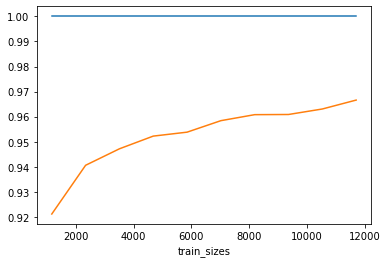

In [568]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')

**TEST MANUEL**

In [ ]:
news=str(input("SAISIR L'INFORMATION : "))
def deploiement(n):
    n=n.lower()
    testing={'text':[n]}
    testing= re.sub(r'\\W'," ",str(testing))
    testing= re.sub(r'\s\s+'," ",str(testing))
    testing= re.sub(r'\[.*?\]',"",str(testing))
    testing= re.sub(r'[^\w\s]','',str(testing))
    testing= re.sub('https?://\S+|www\.\S+',"",str(testing))    
    testing= re.sub('[%s]' % re.escape(string.punctuation),"",str(testing))  
    testing= re.sub('\n',"",str(testing))
    testing= re.sub('\w*\d\w*',"",str(testing))
    testing={'text':[testing]}
    testing=pd.DataFrame(testing)
    testing=testing['text']
    testing=vecto.fit_transform(testing)
   
    resultat=model.predict(testing)
    
    #if resultat==0:
        #resultat="L'information n'est pas fausse"
    #if resultat==1:
        #resultat="L'information est fausse"
    #return testing
    print(testing.shape)
deploiement(news)

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 18285, dtype: object